In [1]:
cd C:\\Users\\Maria\\Desktop

C:\Users\Maria\Desktop


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from IPython.core.pylabtools import figsize
import seaborn as sns
import warnings
np.random.seed(451)
warnings.filterwarnings('ignore') 

test_values = pd.read_csv('test_values.csv')
train_labels = pd.read_csv('train_labels.csv')
train_values = pd.read_csv('train_values.csv')

print(test_values.shape)
print(train_values.shape)
print(train_labels.shape)

train = pd.merge(train_values, train_labels, how='inner',on = 'building_id')
print(train.shape)

(86868, 39)
(260601, 39)
(260601, 2)
(260601, 40)


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 260601 entries, 0 to 260600
Data columns (total 40 columns):
building_id                               260601 non-null int64
geo_level_1_id                            260601 non-null int64
geo_level_2_id                            260601 non-null int64
geo_level_3_id                            260601 non-null int64
count_floors_pre_eq                       260601 non-null int64
age                                       260601 non-null int64
area_percentage                           260601 non-null int64
height_percentage                         260601 non-null int64
land_surface_condition                    260601 non-null object
foundation_type                           260601 non-null object
roof_type                                 260601 non-null object
ground_floor_type                         260601 non-null object
other_floor_type                          260601 non-null object
position                                  260601 non

In [4]:
train.describe()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
count,2.606010e+05,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,...,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000
mean,5.256755e+05,13.900353,701.074685,6257.876148,2.129723,26.535029,8.018051,5.434365,0.088645,0.761935,...,0.033626,0.008101,0.000940,0.000361,0.001071,0.000188,0.000146,0.000088,0.005119,2.238272
std,3.045450e+05,8.033617,412.710734,3646.369645,0.727665,73.565937,4.392231,1.918418,0.284231,0.425900,...,0.180265,0.089638,0.030647,0.018989,0.032703,0.013711,0.012075,0.009394,0.071364,0.611814
min,4.000000e+00,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.611900e+05,7.000000,350.000000,3073.000000,2.000000,10.000000,5.000000,4.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,5.257570e+05,12.000000,702.000000,6270.000000,2.000000,15.000000,7.000000,5.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,7.897620e+05,21.000000,1050.000000,9412.000000,2.000000,30.000000,9.000000,6.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,1.052934e+06,30.000000,1427.000000,12567.000000,9.000000,995.000000,100.000000,32.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000


In [5]:
# check for duplicates
idsUnique = len(set(train.building_id))
idsTotal = train.shape[0]
idsDupli = idsTotal - idsUnique
print('ther are ' + str(idsDupli) + ' duplicated IDs for ' + str(idsTotal) + ' total entries')

# chekc for Null
print('null train',train.isnull().values.any())
print('null test',test_values.isnull().values.any())

ther are 0 duplicated IDs for 260601 total entries
null train False
null test False


# explaratory analysis

### numerical values

In [6]:
# Select the numeric columns
numeric_subset = train.select_dtypes('number')
print('numeric cubset', numeric_subset.columns)
print(len(numeric_subset.columns))

categorical_subset = train.select_dtypes('object')
print('categorical subset', categorical_subset.columns)
print(len(categorical_subset.columns))

numeric cubset Index(['building_id', 'geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id',
       'count_floors_pre_eq', 'age', 'area_percentage', 'height_percentage',
       'has_superstructure_adobe_mud', 'has_superstructure_mud_mortar_stone',
       'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other',
       'count_families', 'has_secondary_use', 'has_secondary_use_agriculture',
       'has_secondary_use_hotel', 'has_secondary_use_rental',
       'has_secondary_use_institution', 'has_secondary_use_school',
       'has_secondary_use_industry', 'has_secondary_use_health_post',
       'has_secondary_use_gov_office', 'has_secondary_use_use_police',
       'has_secondary_use_other', 'damage_gr

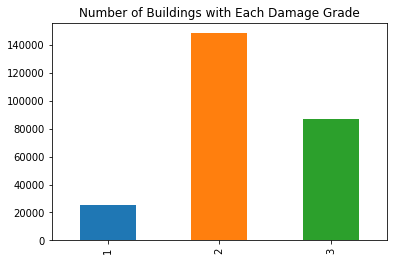

In [7]:
(train_labels.damage_grade
             .value_counts()
             .sort_index()
             .plot.bar(title="Number of Buildings with Each Damage Grade"))

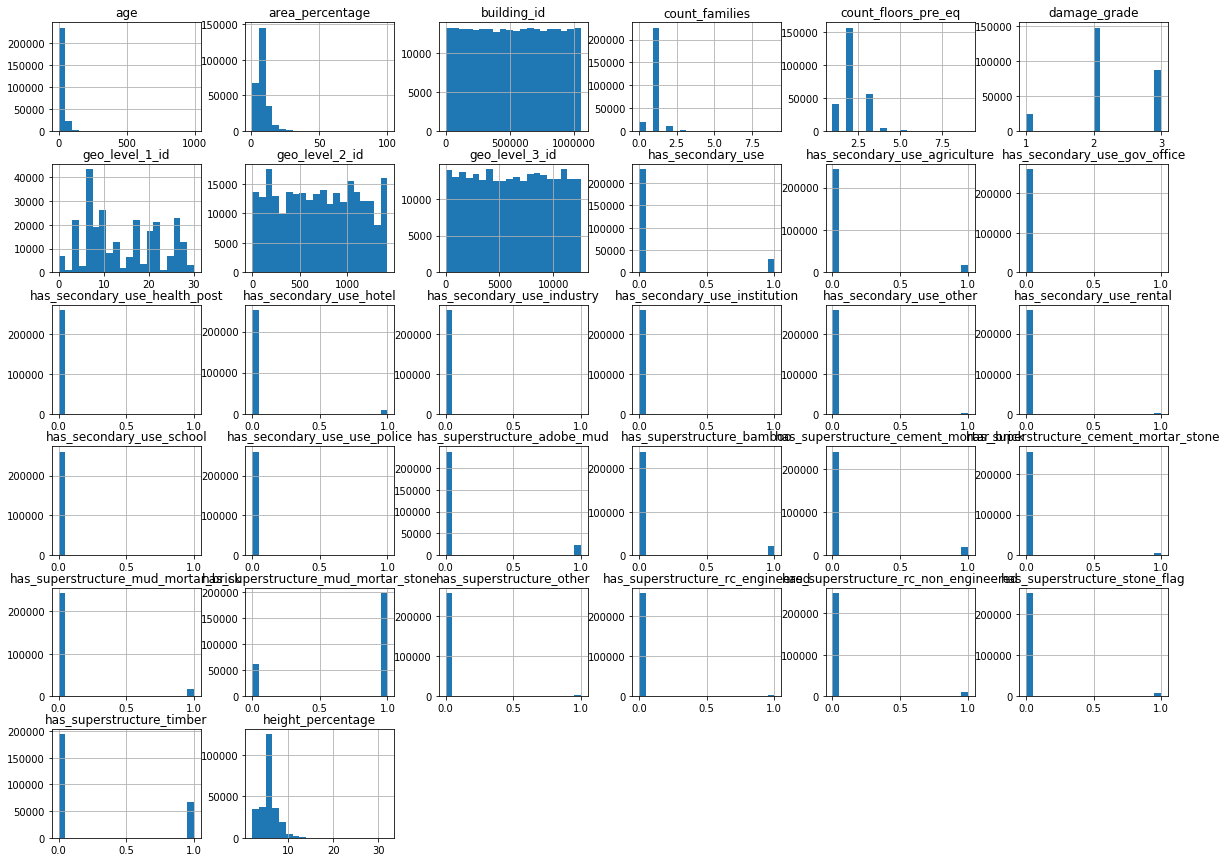

In [8]:
# numeric values
numeric_features = train.select_dtypes(include=[np.number])
numeric_features.hist(bins=20, figsize=(20, 15), layout=(6, 6));

### Univariate Distribution

Text(0.5, 1.0, 'floors distibution')

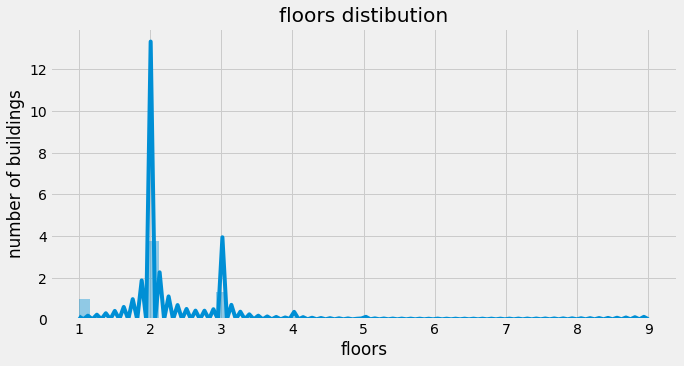

In [9]:
# distribution: count_floors_pre_eq
plt.style.use('fivethirtyeight')
plt.figure(figsize = (10,5))
sns.distplot(train.count_floors_pre_eq, bins = 50)
plt.ticklabel_format(style = 'plain', axis = 'x', scilimits=(0,1))
plt.xlabel('floors')
plt.ylabel('number of buildings')
plt.title('floors distibution')

2    156623
3     55617
1     40441
4      5424
5      2246
6       209
7        39
9         1
8         1
Name: count_floors_pre_eq, dtype: int64


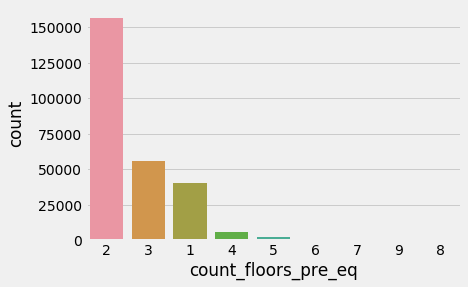

In [10]:
#countplot: count_floors_pre_eq
import seaborn as sns
print(train_values['count_floors_pre_eq'].value_counts())
order = train_values['count_floors_pre_eq'].value_counts(ascending = False).index
sns.countplot(x = 'count_floors_pre_eq',data = train_values, order = order)

Text(0.5, 1.0, 'age distribution')

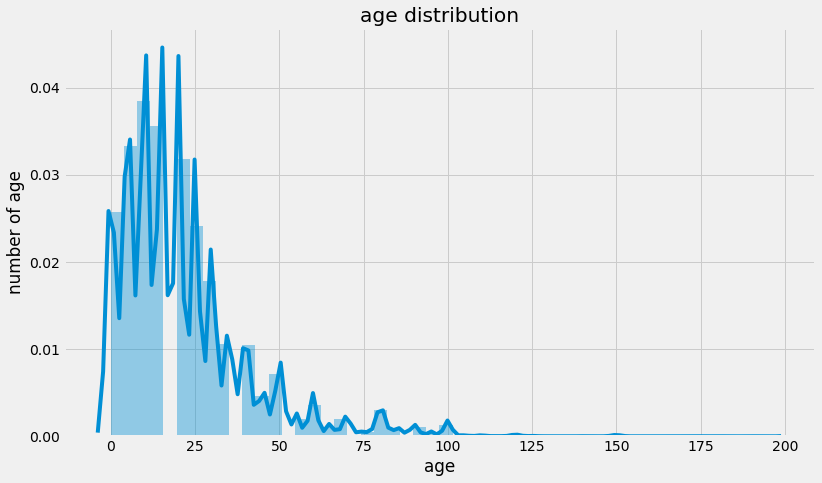

In [11]:
# age distribution in range 0 -200
age = train.loc[(train['age'] < 200)]


plt.style.use('fivethirtyeight')
plt.figure(figsize = (12,7))
sns.distplot(age['age'], bins = 50)
plt.ticklabel_format(style = 'plain', axis = 'x', scilimits=(0,2))
plt.xlabel('age')
plt.ylabel('number of age')
plt.title('age distribution')

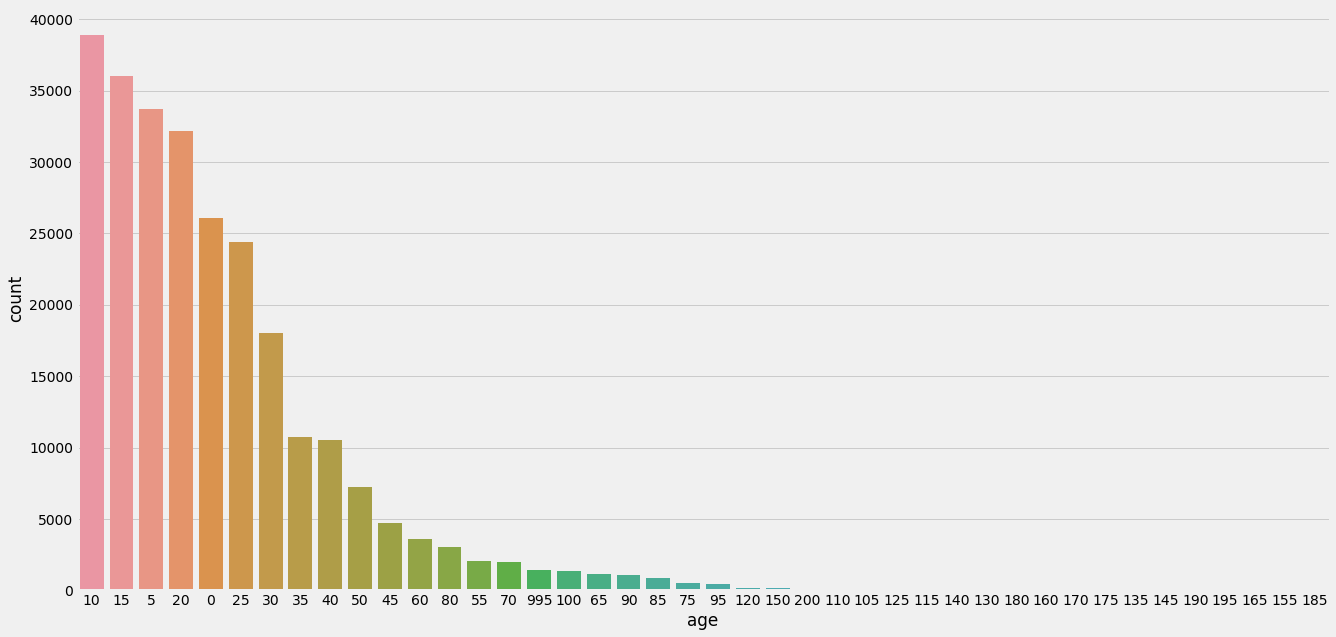

In [12]:
import seaborn as sns
plt.figure(figsize=(20,10))

order = train_values['age'].value_counts(ascending = False).index
sns.countplot(x = 'age',data = train_values, order = order)

Text(0.5, 1.0, 'area percentage distribution')

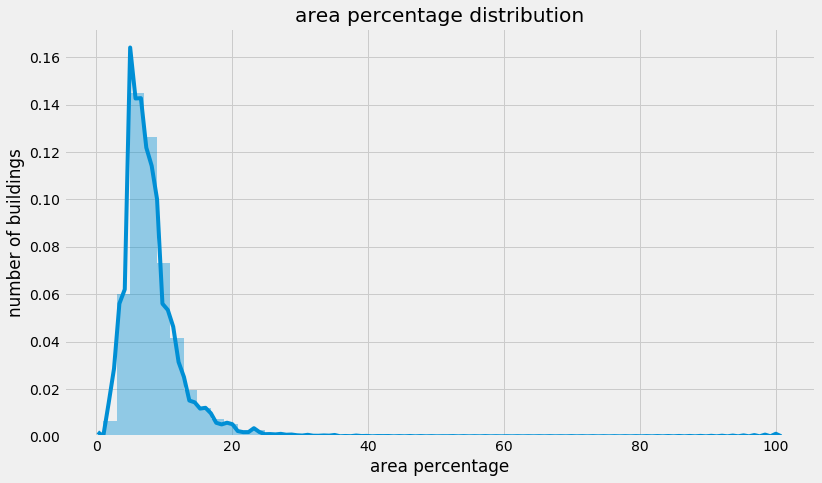

In [13]:
# area_percentage 
plt.style.use('fivethirtyeight')
plt.figure(figsize = (12,7))
sns.distplot(train['area_percentage'], bins = 50)
plt.ticklabel_format(style = 'plain', axis = 'x', scilimits=(0,2))
plt.xlabel('area percentage')
plt.ylabel('number of buildings')
plt.title('area percentage distribution')

Text(0.5, 1.0, 'area percentage distribution')

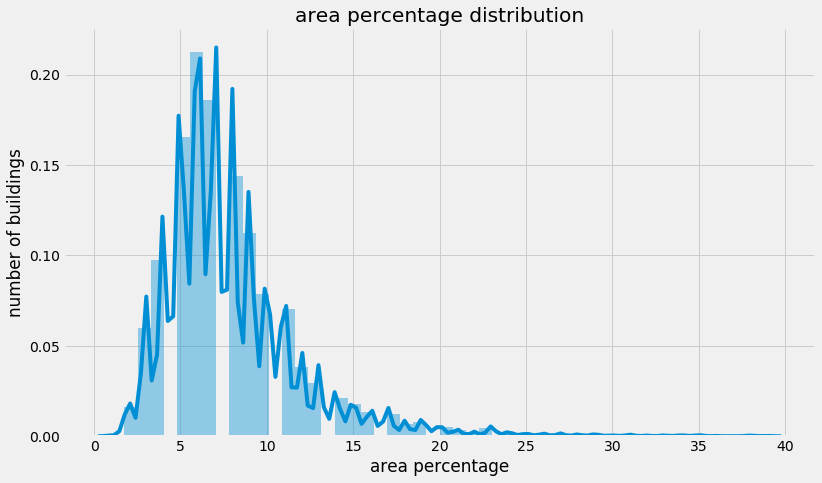

In [14]:
# are_percnetage distribution in range 0-40
area_percentage = train.loc[(train['area_percentage'] < 40)]

plt.style.use('fivethirtyeight')
plt.figure(figsize = (12,7))
sns.distplot(area_percentage['area_percentage'], bins = 50)
plt.ticklabel_format(style = 'plain', axis = 'x', scilimits=(0,2))
plt.xlabel('area percentage')
plt.ylabel('number of buildings')
plt.title('area percentage distribution')

Text(0.5, 1.0, 'height percentage distribution')

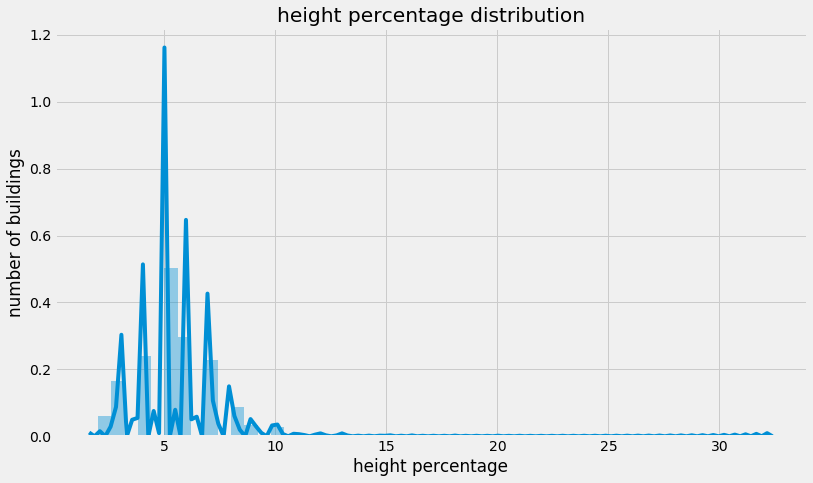

In [15]:
# height_percentage

plt.style.use('fivethirtyeight')
plt.figure(figsize = (12,7))
sns.distplot(train['height_percentage'], bins = 50)
plt.ticklabel_format(style = 'plain', axis = 'x', scilimits=(0,2))
plt.xlabel('height percentage')
plt.ylabel('number of buildings')
plt.title('height percentage distribution')

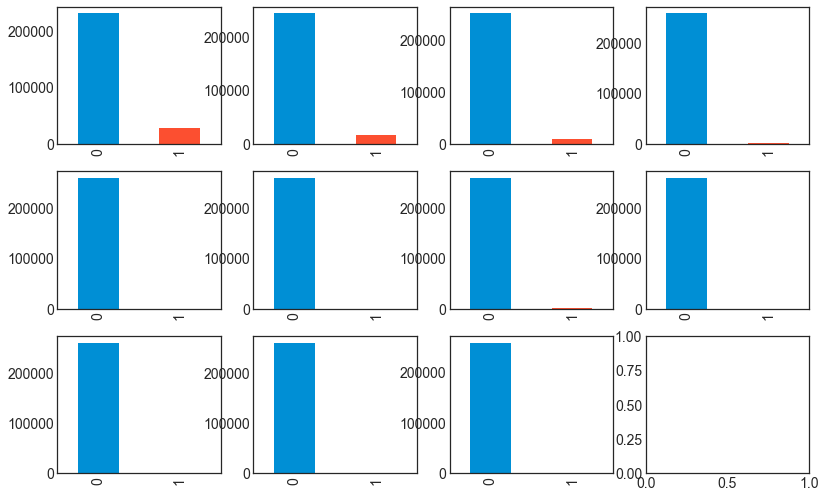

In [16]:
plt.style.use('seaborn-white')
fig, axarr = plt.subplots(3,4, figsize=(12, 8))
train['has_secondary_use'].value_counts().plot.bar(ax=axarr[0][0])

train['has_secondary_use_agriculture'].value_counts().plot.bar(ax=axarr[0][1])
train['has_secondary_use_hotel'].value_counts().plot.bar(ax=axarr[0][2])
train['has_secondary_use_rental'].value_counts().plot.bar(ax=axarr[0][3])
train['has_secondary_use_institution'].value_counts().plot.bar(ax=axarr[1][0])
train['has_secondary_use_school'].value_counts().plot.bar(ax=axarr[1][1])
train['has_secondary_use_industry'].value_counts().plot.bar(ax=axarr[1][2])
train['has_secondary_use_health_post'].value_counts().plot.bar(ax=axarr[1][3])
train['has_secondary_use_gov_office'].value_counts().plot.bar(ax=axarr[2][0])
train['has_secondary_use_use_police'].value_counts().plot.bar(ax=axarr[2][1])
train['has_secondary_use_other'].value_counts().plot.bar(ax=axarr[2][2])


### visualization: has_superstructure


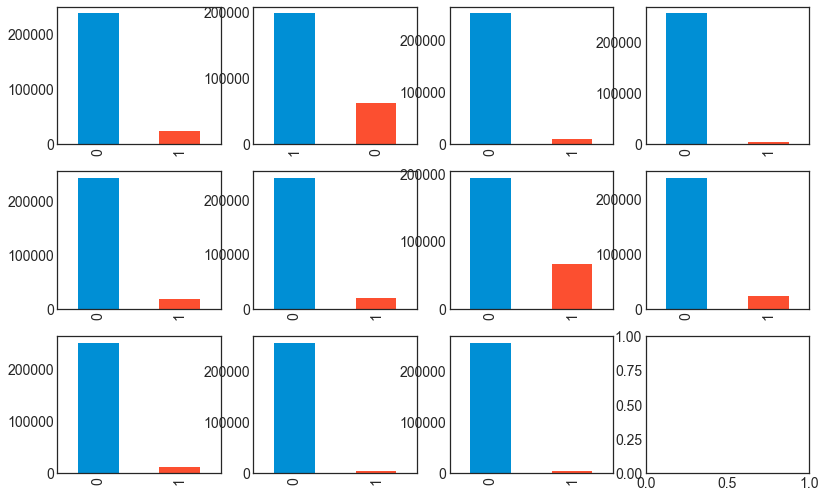

In [17]:
plt.style.use('seaborn-white')
fig, axarr = plt.subplots(3,4, figsize=(12, 8))
train['has_superstructure_adobe_mud'].value_counts().plot.bar(ax=axarr[0][0])

train['has_superstructure_mud_mortar_stone'].value_counts().plot.bar(ax=axarr[0][1])
train['has_superstructure_stone_flag'].value_counts().plot.bar(ax=axarr[0][2])
train['has_superstructure_cement_mortar_stone'].value_counts().plot.bar(ax=axarr[0][3])
train['has_superstructure_mud_mortar_brick'].value_counts().plot.bar(ax=axarr[1][0])
train['has_superstructure_cement_mortar_brick'].value_counts().plot.bar(ax=axarr[1][1])
train['has_superstructure_timber'].value_counts().plot.bar(ax=axarr[1][2])
train['has_superstructure_bamboo'].value_counts().plot.bar(ax=axarr[1][3])
train['has_superstructure_rc_non_engineered'].value_counts().plot.bar(ax=axarr[2][0])
train['has_superstructure_rc_engineered'].value_counts().plot.bar(ax=axarr[2][1])
train['has_superstructure_other'].value_counts().plot.bar(ax=axarr[2][2])


# categorical variable

In [18]:
cat_train = train.select_dtypes(include = ['object']).copy()
cat_train.columns

Index(['land_surface_condition', 'foundation_type', 'roof_type',
       'ground_floor_type', 'other_floor_type', 'position',
       'plan_configuration', 'legal_ownership_status'],
      dtype='object')

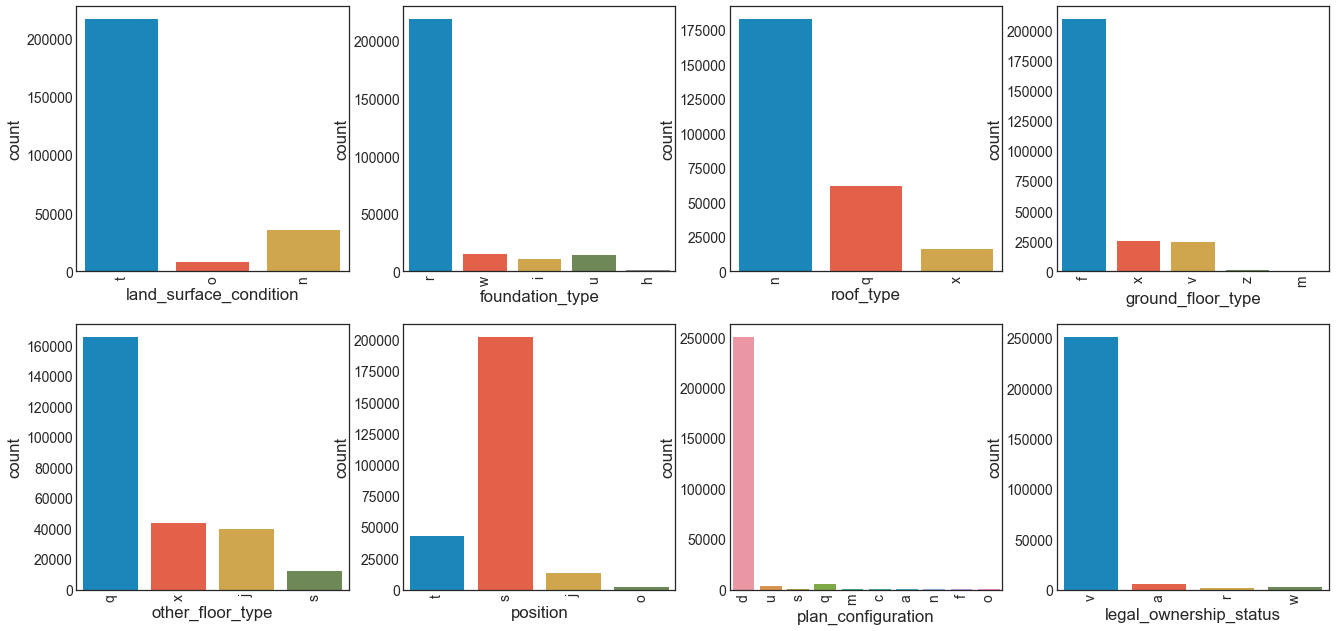

In [19]:

fig, ax = plt.subplots(2, 4, figsize=(20, 10))
for variable, subplot in zip(cat_train, ax.flatten()):
    sns.countplot(cat_train[variable], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

d    250072
q      5692
u      3649
s       346
c       325
a       252
o       159
m        46
n        38
f        22
Name: plan_configuration, dtype: int64


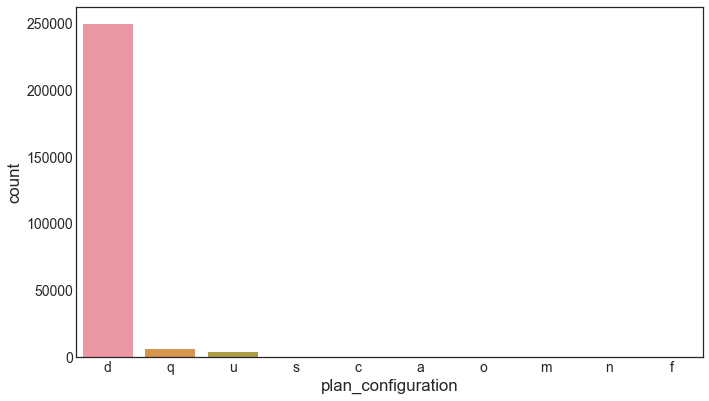

In [20]:
# plan_configuration
plt.figure(figsize=(10, 6))
print(train_values['plan_configuration'].value_counts())
order = train_values['plan_configuration'].value_counts(ascending = False).index
sns.countplot(x = 'plan_configuration',data = train_values, order = order)

v    250939
a      5512
w      2677
r      1473
Name: legal_ownership_status, dtype: int64


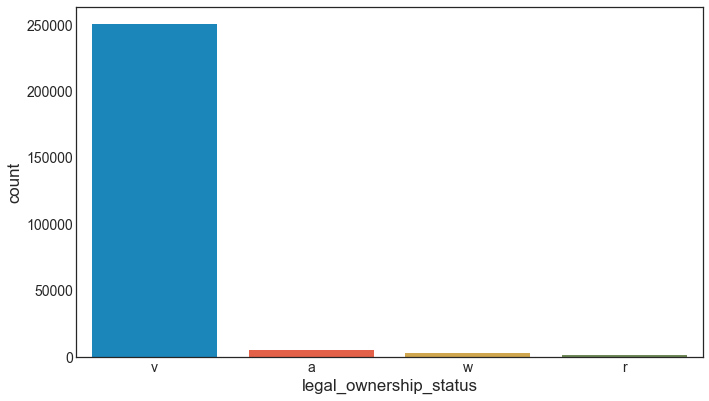

In [21]:
# legal_ownership_status
plt.figure(figsize=(10, 6))
print(train['legal_ownership_status'].value_counts())
order = train['legal_ownership_status'].value_counts(ascending = False).index
sns.countplot(x = 'legal_ownership_status',data = train_values, order = order)

# Encoding 

In [22]:
print(test_values.shape)
print(train_values.shape)
print(train_labels.shape)
print(train.shape)

(86868, 39)
(260601, 39)
(260601, 2)
(260601, 40)


### I decided reduce dataset.
while I was trying different appoaches, processing time was very long and as my goal was to learn, working with smaller data was much easier.

In [23]:
train = train.sample(frac = 0.01)
test = test_values.sample(frac = 0.01)
print(train.shape)
print(test.shape)


(2606, 40)
(869, 39)


# encoding

In [24]:
# Select the numeric columns
numeric_subset = train.select_dtypes('number')


# Select the categorical columns
categorical_subset = train[['land_surface_condition', 'foundation_type', 'roof_type',
       'ground_floor_type', 'other_floor_type', 'position',
       'plan_configuration', 'legal_ownership_status']]

# One hot encode
categorical_subset = pd.get_dummies(categorical_subset)

# Join the two dataframes using concat
# Make sure to use axis = 1 to perform a column bind
train_dummy = pd.concat([numeric_subset, categorical_subset], axis = 1)
print(train_dummy.shape)


(2606, 67)


In [25]:
# Select the numeric columns
test_numeric_subset = test.select_dtypes('number')


# Select the categorical columns
test_categorical_subset = test[['land_surface_condition', 'foundation_type', 'roof_type',
       'ground_floor_type', 'other_floor_type', 'position',
       'plan_configuration', 'legal_ownership_status']]

# One hot encode
test_categorical_subset = pd.get_dummies(test_categorical_subset)

# Join the two dataframes using concat
# Make sure to use axis = 1 to perform a column bind
test_dummy = pd.concat([test_numeric_subset, test_categorical_subset], axis = 1)

# Drop buildings without an energy star score
#test_encoded_features = test_encoded_features.dropna(subset = ['damage_grade'])
print(test_dummy.shape)


(869, 66)


size of the tra set and test set after encoding differ.
checking.

In [26]:
print(len(categorical_subset.columns))
categorical_subset.columns

35


Index(['land_surface_condition_n', 'land_surface_condition_o',
       'land_surface_condition_t', 'foundation_type_h', 'foundation_type_i',
       'foundation_type_r', 'foundation_type_u', 'foundation_type_w',
       'roof_type_n', 'roof_type_q', 'roof_type_x', 'ground_floor_type_f',
       'ground_floor_type_m', 'ground_floor_type_v', 'ground_floor_type_x',
       'ground_floor_type_z', 'other_floor_type_j', 'other_floor_type_q',
       'other_floor_type_s', 'other_floor_type_x', 'position_j', 'position_o',
       'position_s', 'position_t', 'plan_configuration_a',
       'plan_configuration_c', 'plan_configuration_d', 'plan_configuration_o',
       'plan_configuration_q', 'plan_configuration_s', 'plan_configuration_u',
       'legal_ownership_status_a', 'legal_ownership_status_r',
       'legal_ownership_status_v', 'legal_ownership_status_w'],
      dtype='object')

In [27]:
print(len(test_categorical_subset.columns))
test_categorical_subset.columns


35


Index(['land_surface_condition_n', 'land_surface_condition_o',
       'land_surface_condition_t', 'foundation_type_h', 'foundation_type_i',
       'foundation_type_r', 'foundation_type_u', 'foundation_type_w',
       'roof_type_n', 'roof_type_q', 'roof_type_x', 'ground_floor_type_f',
       'ground_floor_type_m', 'ground_floor_type_v', 'ground_floor_type_x',
       'ground_floor_type_z', 'other_floor_type_j', 'other_floor_type_q',
       'other_floor_type_s', 'other_floor_type_x', 'position_j', 'position_o',
       'position_s', 'position_t', 'plan_configuration_a',
       'plan_configuration_c', 'plan_configuration_d', 'plan_configuration_o',
       'plan_configuration_q', 'plan_configuration_s', 'plan_configuration_u',
       'legal_ownership_status_a', 'legal_ownership_status_r',
       'legal_ownership_status_v', 'legal_ownership_status_w'],
      dtype='object')

d    2498
q      67
u      32
c       3
a       2
s       2
o       2
Name: plan_configuration, dtype: int64


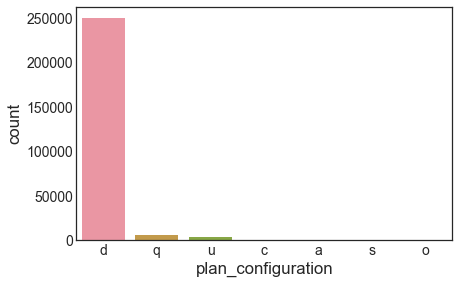

In [28]:

#countplot: count_floors_pre_eq
import seaborn as sns
print(train['plan_configuration'].value_counts())
order = train['plan_configuration'].value_counts(ascending = False).index
sns.countplot(x = 'plan_configuration',data = train_values, order = order)

d    825
q     27
u     10
c      3
s      2
o      1
a      1
Name: plan_configuration, dtype: int64


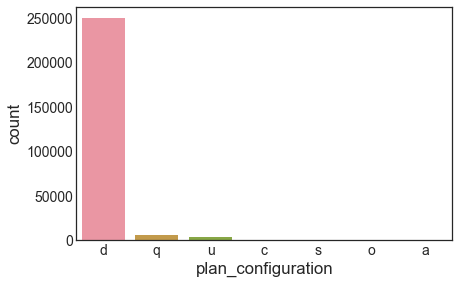

In [29]:

#countplot: count_floors_pre_eq
import seaborn as sns
print(test['plan_configuration'].value_counts())
order = test['plan_configuration'].value_counts(ascending = False).index
sns.countplot(x = 'plan_configuration',data = train_values, order = order)

train set and test set differ. some values from 'Plan Configuration' are absent in test set.

In [30]:

# remove plan configuration from train and test datasets
# drop pan configuration
train.drop(['plan_configuration','ground_floor_type'], axis =1, inplace =True)
print(train.shape)
test.drop(['plan_configuration','ground_floor_type'], axis =1, inplace =True)
print(test.shape)

(2606, 38)
(869, 37)


# encoding try 2

In [31]:
# Select the numeric columns
numeric_subset = train.select_dtypes('number')


# Select the categorical columns
categorical_subset = train[['land_surface_condition', 'foundation_type', 'roof_type','other_floor_type', 'position', 'legal_ownership_status']]

# One hot encode
categorical_subset = pd.get_dummies(categorical_subset)

# Join the two dataframes using concat
# Make sure to use axis = 1 to perform a column bind
train_dummy = pd.concat([numeric_subset, categorical_subset], axis = 1)
print(train_dummy.shape)


(2606, 55)


In [32]:
# Select the numeric columns
numeric_subset = test.select_dtypes('number')


# Select the categorical columns
categorical_subset = test[['land_surface_condition', 'foundation_type', 'roof_type','other_floor_type', 'position', 'legal_ownership_status']]

# One hot encode
categorical_subset = pd.get_dummies(categorical_subset)

# Join the two dataframes using concat
# Make sure to use axis = 1 to perform a column bind
test_dummy = pd.concat([numeric_subset, categorical_subset], axis = 1)
print(test_dummy.shape)


(869, 54)


# train

In [33]:
y = train_dummy['damage_grade']
x = train_dummy.drop('damage_grade', axis =1)
print('x',x.shape)
print('y',y.shape)

x (2606, 54)
y (2606,)


In [34]:
final_test = test_dummy
final_test.shape

(869, 54)

In [35]:
# for preprocessing the data
from sklearn.preprocessing import StandardScaler

# the model
from sklearn.ensemble import RandomForestClassifier

# for combining the preprocess with model training
from sklearn.pipeline import make_pipeline

# for optimizing the hyperparameters of the pipeline
from sklearn.model_selection import GridSearchCV

pipe = make_pipeline(StandardScaler(), 
                     RandomForestClassifier(random_state=2018))
param_grid = {'randomforestclassifier__n_estimators': [50, 100],
              'randomforestclassifier__min_samples_leaf': [1, 5]}
gs = GridSearchCV(pipe, param_grid, cv=5)

gs.fit(x, y)
print('best parameters',gs.best_params_)
from sklearn.metrics import f1_score

in_sample_preds = gs.predict(x)
print('f1 score',f1_score(y, in_sample_preds, average='micro'))

best parameters {'randomforestclassifier__min_samples_leaf': 5, 'randomforestclassifier__n_estimators': 50}
f1 score 0.772831926323868


In [36]:
predictions = gs.predict(final_test)
submission_format = pd.read_csv('submission_format.csv', index_col='building_id')
print('submission_ format', submission_format.shape)

submission_short = submission_format.sample(frac = 0.01)
print('submission_short',submission_short.shape)

my_submission = pd.DataFrame(data=predictions,
                             columns=submission_short.columns,
                             index=submission_short.index)

my_submission.head()

submission_ format (86868, 1)
submission_short (869, 1)


,damage_grade
building_id,
994750,2
124401,3
337948,2
17106,2
81570,2


# feature selection

In [37]:
print('x',x.shape)
print('y',y.shape)
print('final test',final_test.shape)

x (2606, 54)
y (2606,)
final test (869, 54)


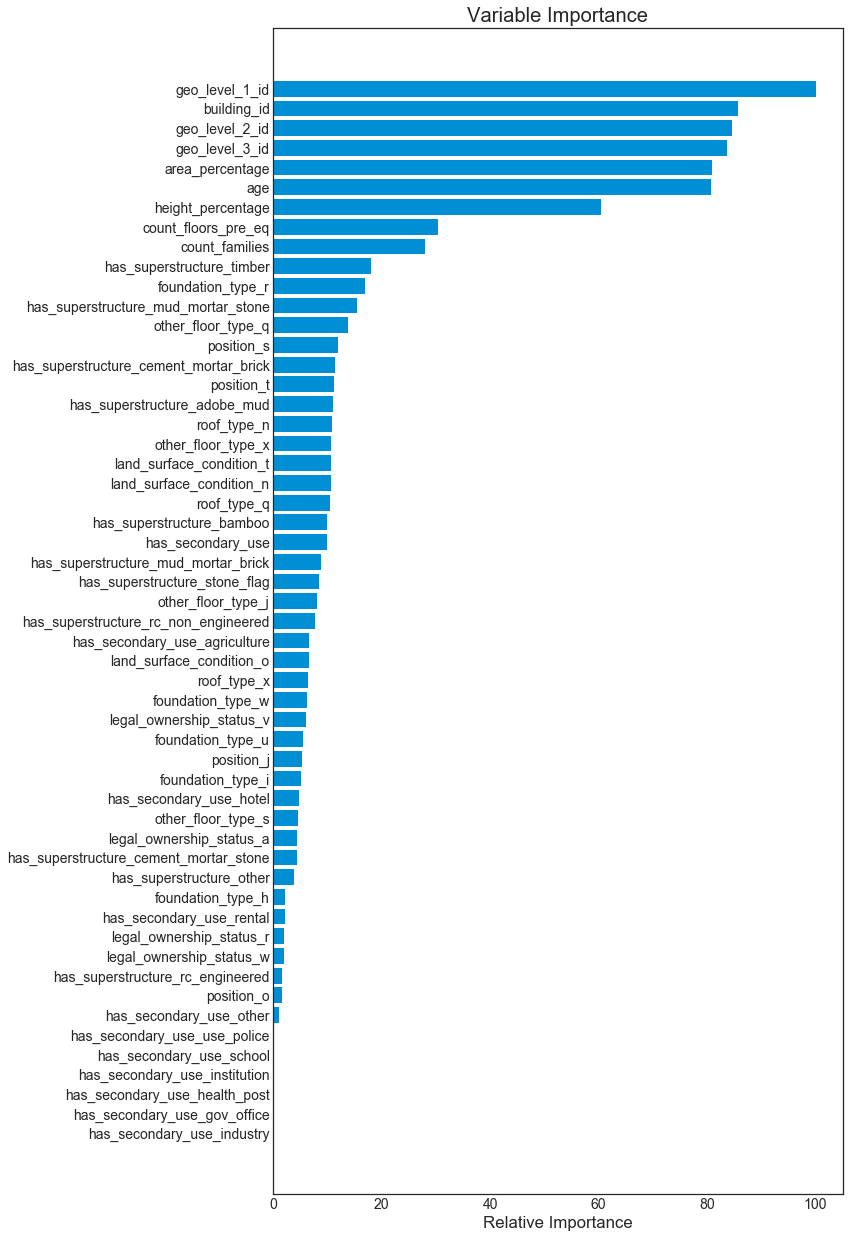

In [38]:
from sklearn.ensemble import ExtraTreesClassifier
plt.figure(figsize=(20,20))
SEED = 7
np.random.seed(SEED)
clf = ExtraTreesClassifier(n_estimators=250,
                              random_state=SEED)

clf.fit(x, y)

# #############################################################################
# Plot feature importance
feature_importance = clf.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, x.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [39]:
#apply SelectKBest class to extract top 10 best features
# The example below uses the chi-squared (chi²) statistical test 
# for non-negative features to select 10 of the best features 
# from the Mobile Price Range Prediction Dataset.
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(x,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

                                     Specs          Score
0                              building_id  487986.597092
3                           geo_level_3_id    3258.653322
2                           geo_level_2_id    1343.517309
5                                      age    1006.638012
1                           geo_level_1_id     355.479750
41                             roof_type_x     219.931029
35                       foundation_type_i     190.126374
13  has_superstructure_cement_mortar_brick     173.449780
44                      other_floor_type_s     131.189612
38                       foundation_type_w     112.422042


In [40]:
corr = train_dummy.corr()

print (corr['damage_grade'].sort_values(ascending=False).head(10))

print (corr['damage_grade'].sort_values(ascending=False).tail(10))

damage_grade                           1.000000
foundation_type_r                      0.342252
has_superstructure_mud_mortar_stone    0.289007
other_floor_type_q                     0.197730
count_floors_pre_eq                    0.120173
count_families                         0.093791
roof_type_q                            0.091975
roof_type_n                            0.062823
height_percentage                      0.062714
land_surface_condition_o               0.056787
Name: damage_grade, dtype: float64
has_superstructure_rc_non_engineered     -0.139720
foundation_type_u                        -0.169889
foundation_type_w                        -0.180274
other_floor_type_s                       -0.205810
foundation_type_i                        -0.234701
has_superstructure_cement_mortar_brick   -0.257800
roof_type_x                              -0.265497
has_secondary_use_industry                     NaN
has_secondary_use_health_post                  NaN
has_secondary_use_gov_offi

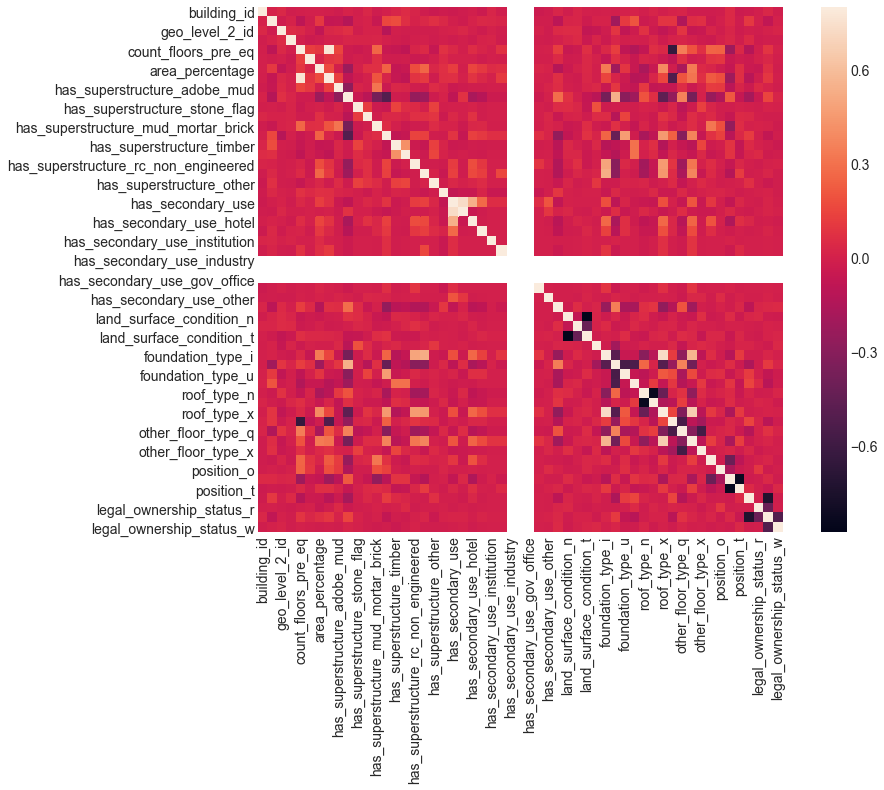

In [41]:
#correlation matrix
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corr, vmax=.8, square=True);

In [42]:
selected_features = ('geo_level_1_id', 'geo_level_2_id','geo_level_3_id',
                     'age','area_percentage','count_floors_pre_eq','count_families',
                     'land_surface_condition_n',
                     'position_s','roof_type_n','foundation_type_w', 'foundation_type_r',
                     'has_superstructure_timber','has_superstructure_cement_mortar_brick',
                     'has_superstructure_mud_mortar_stone','has_superstructure_rc_engineered','foundation_type_i')
len(selected_features)

17

In [43]:

train_selected_features = x[['geo_level_1_id', 'geo_level_2_id','geo_level_3_id',
                     'age','area_percentage','count_floors_pre_eq','count_families',
                     'land_surface_condition_n',
                     'position_s','roof_type_n','foundation_type_w', 'foundation_type_r',
                     'has_superstructure_timber','has_superstructure_cement_mortar_brick',
                     'has_superstructure_mud_mortar_stone','has_superstructure_rc_engineered','foundation_type_i'] ]
test_selected_features = final_test[
    ['geo_level_1_id', 'geo_level_2_id','geo_level_3_id',
                     'age','area_percentage','count_floors_pre_eq','count_families',
                     'land_surface_condition_n',
                     'position_s','roof_type_n','foundation_type_w', 'foundation_type_r',
                     'has_superstructure_timber','has_superstructure_cement_mortar_brick',
                     'has_superstructure_mud_mortar_stone','has_superstructure_rc_engineered','foundation_type_i'] ]
print(train_selected_features.shape)
print(test_selected_features.shape)

(2606, 17)
(869, 17)


# train with selected features

In [44]:
gs.fit(train_selected_features, y)
print('best parameters',gs.best_params_)
from sklearn.metrics import f1_score

in_sample_preds = gs.predict(train_selected_features)
print('f1 score',f1_score(y, in_sample_preds, average='micro'))

best parameters {'randomforestclassifier__min_samples_leaf': 5, 'randomforestclassifier__n_estimators': 100}
f1 score 0.7966231772831927


previous (with no selected features) f1 score: 0.772831926323868

# compare different model

In [45]:
from random import sample  
from sklearn.linear_model import LogisticRegression  
from sklearn import tree  
from sklearn.ensemble import RandomForestClassifier  
from sklearn.svm import SVC  
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.naive_bayes import GaussianNB 

In [46]:
# Create the scaler object with a range of 0-1
# Imputing missing values and scaling values
from sklearn.preprocessing import Imputer, MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

# Fit on the training data
scaler.fit(train_selected_features)

# Transform both the training and testing data
x = scaler.transform(train_selected_features)
x_test = scaler.transform(test_selected_features)

### Random forest classifier

In [47]:
# Instantiate
rf = RandomForestClassifier()  
# Fit
rf_model = rf.fit(x, y)  

rf_model.score(x, y)

# Predictions/probs on the test dataset
predicted = pd.DataFrame(rf_model.predict(x))  

f1_score(y, predicted, average='micro')

0.9834996162701458

# SVC

In [48]:
# Instantiate
svm_model = SVC(probability=True)  
# Fit
svm_model = svm_model.fit(x, y)  
# Accuracy
svm_model.score(x, y)

# Predictions/probs on the test dataset
predicted = pd.DataFrame(svm_model.predict(x))  
f1_score(y, predicted, average='micro')


0.5671527244819647

# DecisionTreeClassifier

In [49]:
tree_model = tree.DecisionTreeClassifier(max_depth=3)  
# Fit a decision tree
tree_model = tree_model.fit(x, y)  
# Training accuracy
tree_model.score(x, y)

# Predictions/probs on the test dataset
predicted = pd.DataFrame(tree_model.predict(x))  
f1_score(y, predicted, average='micro')

0.5805832693783577

# KNeighborsClassifier

In [50]:
# instantiate learning model (k = 3[InternetShortcut]
URL=http://localhost:8888/notebooks/projects%20UFT/FINAL.ipynb#KNeighborsClassifier
)
knn_model = KNeighborsClassifier(n_neighbors=3)  
# fit the model
knn_model.fit(x, y)  
# Accuracy
knn_model.score(x, y)

# Predictions/probs on the test dataset
predicted = pd.DataFrame(knn_model.predict(x))  

f1_score(y, predicted, average='micro')


0.7613200306983884

# GaussianNB

In [51]:
# Instantiate
bayes_model = GaussianNB()  
# Fit the model
bayes_model.fit(x, y)  
# Accuracy
bayes_model.score(x, y)

# Predictions/probs on the test dataset
predicted = pd.DataFrame(bayes_model.predict(x))  

f1_score(y, predicted, average='micro') 

0.398695318495779

# Hyperparameter Tuning the Random Forest



# Try 1

In [52]:
rfc=RandomForestClassifier(random_state=42)
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(x, y)
CV_rfc.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'auto',
 'n_estimators': 500}

In [53]:
rfc1=RandomForestClassifier(random_state=42, max_features='auto',
                            n_estimators= 500, max_depth=8, criterion='gini')
rfc1.fit(x, y)
in_sample_preds = rfc1.predict(x)
print('f1 score',f1_score(y, in_sample_preds, average='micro'))

f1 score 0.7367613200306984


# Try 2

In [54]:
from sklearn.pipeline import Pipeline
pipe = Pipeline([('classifier', RandomForestClassifier())])

# Create space of candidate learning algorithms and their hyperparameters
search_space = [ {'classifier': [RandomForestClassifier()],
                 'classifier__n_estimators': [10, 100, 1000],
                 'classifier__max_features': [1, 2, 3]}]
# Create grid search 
clf = GridSearchCV(pipe, search_space, cv=5, verbose=0)
best_model = clf.fit(x, y)
# View Best Model And Its Best Hyperparameters
best_model.best_estimator_.get_params()['classifier']
# Predict target vector
best_model.predict(x)

array([3, 3, 3, ..., 3, 2, 1], dtype=int64)

In [55]:
print('best parameters',clf.best_params_)

best parameters {'classifier': RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=3, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False), 'classifier__max_features': 3, 'classifier__n_estimators': 1000}


In [56]:
in_sample_preds = best_model.predict(x)
print('f1 score',f1_score(y, in_sample_preds, average='micro'))

f1 score 1.0


In [57]:
predictions = clf.predict(test_selected_features)

In [58]:
my_submission = pd.DataFrame(data=predictions,
                             columns=submission_short.columns,
                             index=submission_short.index)

my_submission.head(20)

,damage_grade
building_id,
994750,2
124401,3
337948,3
17106,3
81570,2
553054,2
1047331,2
452275,2
657866,2
